## Plotting Charts with MatPlotLib

Use the Matplotlib library to generate simple plots from Datasets One of the main libraries for scientifical data exploration, allows for quick prototyping and has all basic functionalities Was built with the MATLAB interface as a reference Compatible with Jupyter notebooks, facilitating it’s usage on interactive python clients Has a very rich gallery page with tons of examples that can be copied and modified Allows users to save figures in high resolution for printing and supports many different formats Let’s take a look together at matplotlib in the CEBD-1160-code project

Let's prepare our notebook by importing the necessary libs 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

Load the data and read basic info.

In [3]:
insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Now, let's create a folder to save the charts.

In [6]:
os.makedirs('plots/BasicPlotting', exist_ok=True)

### Okay, now let's start to do some visualizations

First, plot the **line chart for charges** and save it as `charges_plot.png`

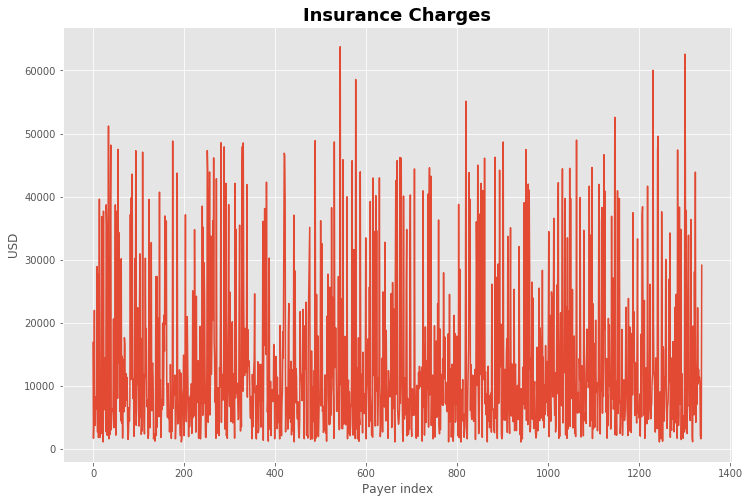

In [7]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
plt.plot(insurance['charges'])
plt.title('Insurance Charges', fontdict={'fontweight': 'bold', 'fontsize': 18})
plt.xlabel('Payer index')
plt.ylabel('USD')
plt.savefig(f'plots/BasicPlotting/charges_plot.png', format='png')
plt.show()

Next, plot the **histogram for bmi** and save it as `bmi_hist.png`

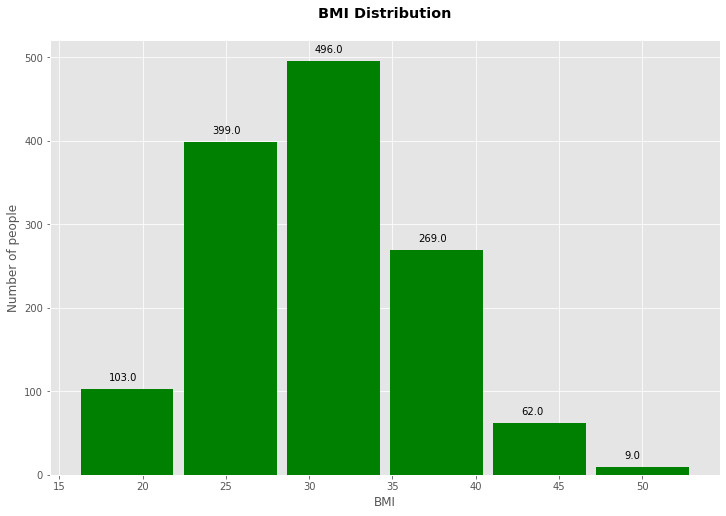

In [8]:
plt.figure(figsize=(12, 8))
# display the count over the bar and "+2 & +10" is to adjust the coordinates to show text in center of the bar top.
bmiplot = plt.hist(insurance['bmi'], bins=6, color='g', rwidth=0.9)
for i in range(6):
    plt.text(bmiplot[1][i] + 2, bmiplot[0][i] + 10, str(bmiplot[0][i]), color='black', size='medium')

plt.title('BMI Distribution\n', fontdict={'fontweight': 'bold'})
plt.xlabel('BMI')
plt.ylabel('Number of people')
plt.savefig(f'plots/BasicPlotting/bmi_hist.png', format='png')
plt.show()

Next, plot the **scatter plot for age vs charges** and save it as `age_charge_scatter.png`

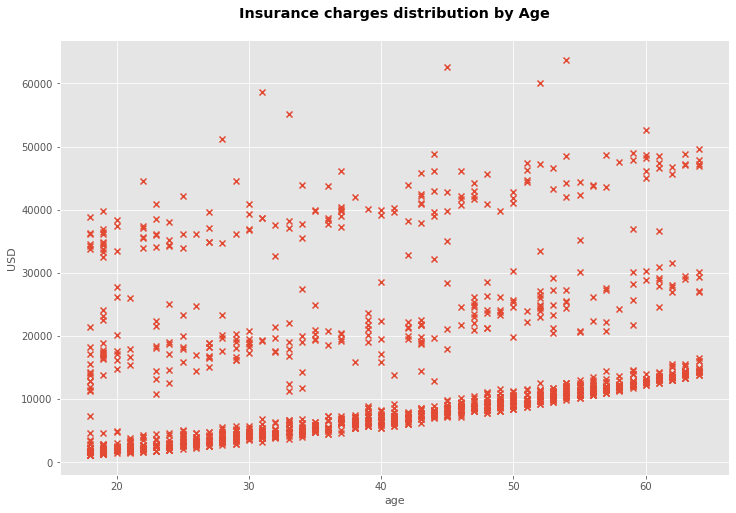

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
plt.scatter(insurance['age'], insurance['charges'], marker='x')
plt.title('Insurance charges distribution by Age\n', fontdict={'fontweight': 'bold'})
plt.xlabel('age', fontdict={'fontsize': 11})
plt.ylabel('USD', fontdict={'fontsize': 11})
plt.savefig(f'plots/BasicPlotting/age_charge_scatter.png', format='png')
plt.show()

Then, Do the plots match what we saw with the correlation function.

> Output from last week:
> The correlation between charges and age is : 0.299008. 
> The correlation between bmi and children is : 0.012759. 

So now let's do a **simple method for plotting heat map**.

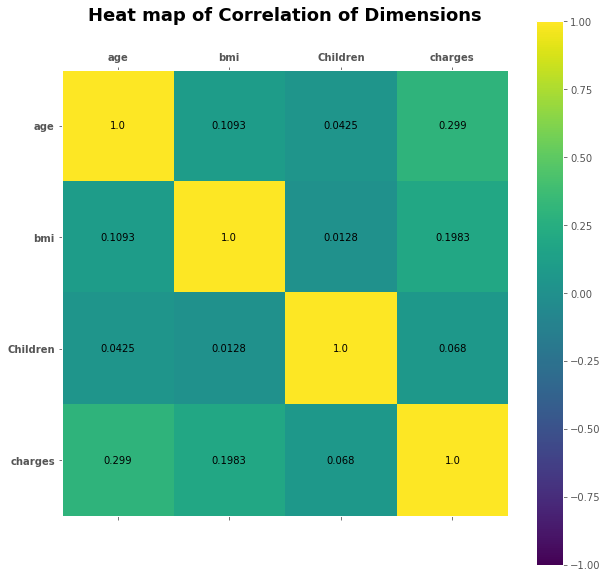

In [10]:
plt.rcParams["axes.grid"] = False
corr = insurance.corr().round(4)
names = ['age', 'bmi', 'Children', 'charges']
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 4, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, fontdict={'fontweight': 'bold'})
ax.set_yticklabels(names, fontdict={'fontweight': 'bold'})
for i in range(0, 4):
    for j in range(0, 4):
        text = ax.text(j, i, corr.iloc[i, j], ha='center', va='center', color='black', size='medium')
ax.set_title('Heat map of Correlation of Dimensions\n', fontdict={'fontweight': 'bold', 'fontsize': 18})
plt.savefig(f'plots/BasicPlotting/corr_map_simple_version.png', format='png')
plt.show()

Here is a more **general correlation heat map** from our instructor.

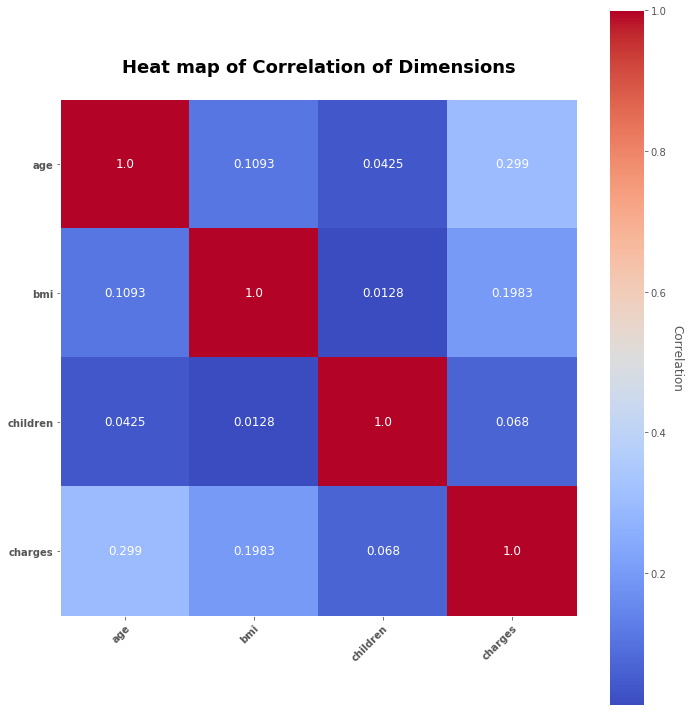

In [11]:
plt.rcParams["axes.grid"] = False
fig, axes = plt.subplots(1, 1, figsize=(10, 10))
correlation = insurance.corr().round(4)
im = axes.imshow(correlation, cmap="coolwarm")
cbar = axes.figure.colorbar(im, ax=axes)
cbar.ax.set_ylabel('Correlation', rotation=-90, va="bottom")
numrows = len(correlation.iloc[0])
numcolumns = len(correlation.columns)
axes.set_xticks(np.arange(numrows))
axes.set_yticks(np.arange(numcolumns))
axes.set_xticklabels(correlation.columns, fontdict={'fontweight': 'bold'})
axes.set_yticklabels(correlation.columns, fontdict={'fontweight': 'bold'})
plt.setp(axes.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
for i in range(numrows):
    for j in range(numcolumns):
        text = axes.text(j, i, correlation.iloc[i, j], ha='center', va='center', color='w', size='large')
axes.set_title('Heat map of Correlation of Dimensions\n', fontdict={'fontweight': 'bold', 'fontsize': 18})
fig.tight_layout()
plt.savefig(f'plots/BasicPlotting/corr_map_general_version.png', format='png')
plt.show()

Now let's plot a **line chart of charges and age**.

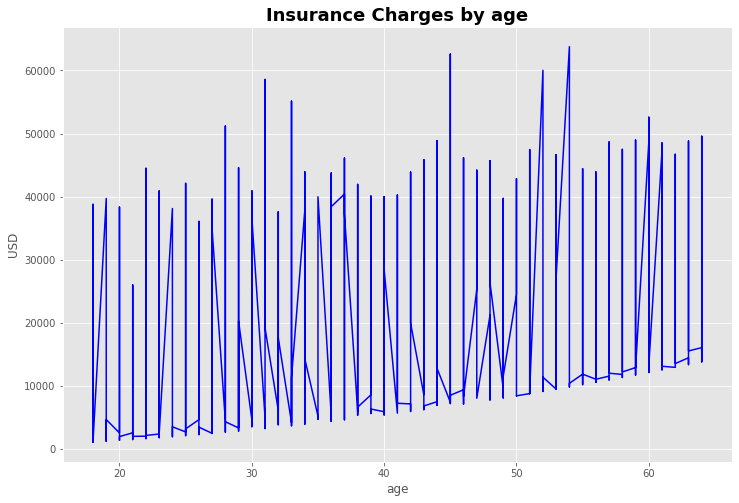

In [22]:
sorted_by_age_df = insurance.sort_values('age')
plt.figure(figsize=(12, 8))
plt.plot(sorted_by_age_df['age'], sorted_by_age_df['charges'], label='Charges', color='b')
plt.title('Insurance Charges by age', fontdict={'fontweight': 'bold', 'fontsize': 18})
plt.xlabel('age')
plt.ylabel('USD')
plt.savefig(f'plots/BasicPlotting/charges_by_age.png', format='png')
plt.show()

Next let's do a **box plot chart** to explore age groups.

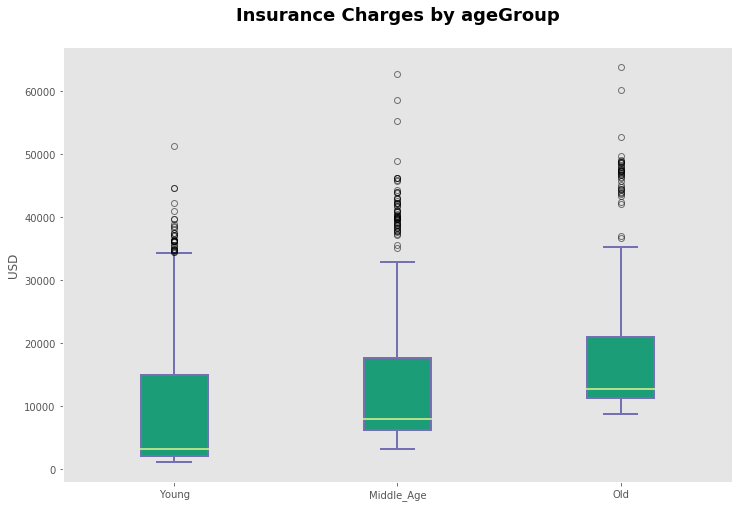

In [13]:
young = insurance.loc[insurance.age < 30]['charges']
middle_age = insurance.loc[(insurance.age > 30) & (insurance.age < 50)]['charges']
old = insurance.loc[insurance.age > 50]['charges']

plt.figure(figsize=(12, 8))
bp = plt.boxplot([young, middle_age, old], labels=['Young', 'Middle_Age', 'Old'], patch_artist=True)
# change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set(color='#7570b3', linewidth=2)
    # change fill color
    box.set(facecolor='#1b9e77')
# change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

# change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

# change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

# change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
plt.title('Insurance Charges by ageGroup\n', fontdict={'fontweight': 'bold', 'fontsize': 18})
plt.ylabel('USD')
plt.savefig(f'plots/BasicPlotting/ageGroup_boxplot.png', format='png')
plt.show()

Plot a **scatter chart** to see if BMI is related with children number in family.


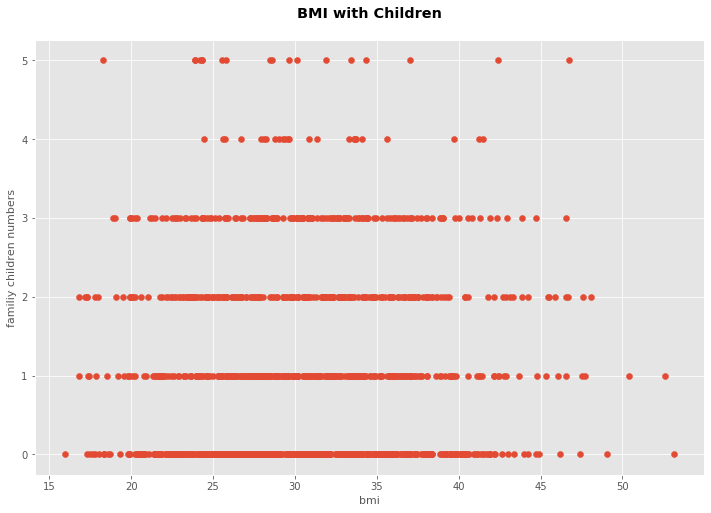

In [27]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
plt.scatter(insurance['bmi'], insurance['children'])
plt.title('BMI with Children\n', fontdict={'fontweight': 'bold'})
plt.xlabel('bmi', fontdict={'fontsize': 11})
plt.ylabel('familiy children numbers', fontdict={'fontsize': 11})
plt.savefig(f'plots/BasicPlotting/BMI_by_children_scatter.png', format='png')
plt.show()